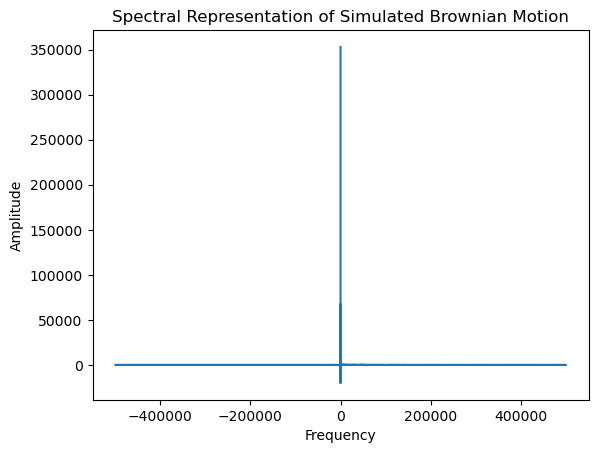

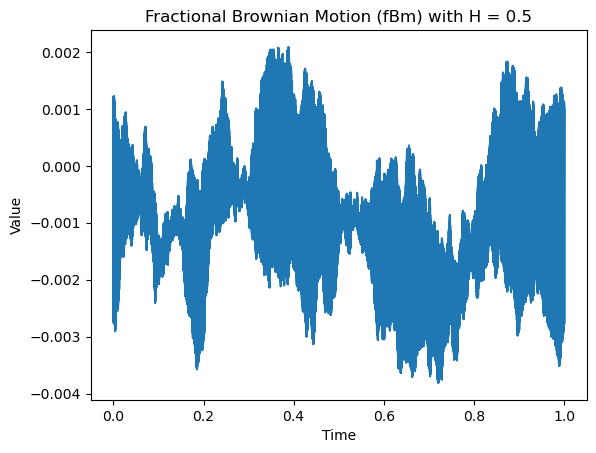

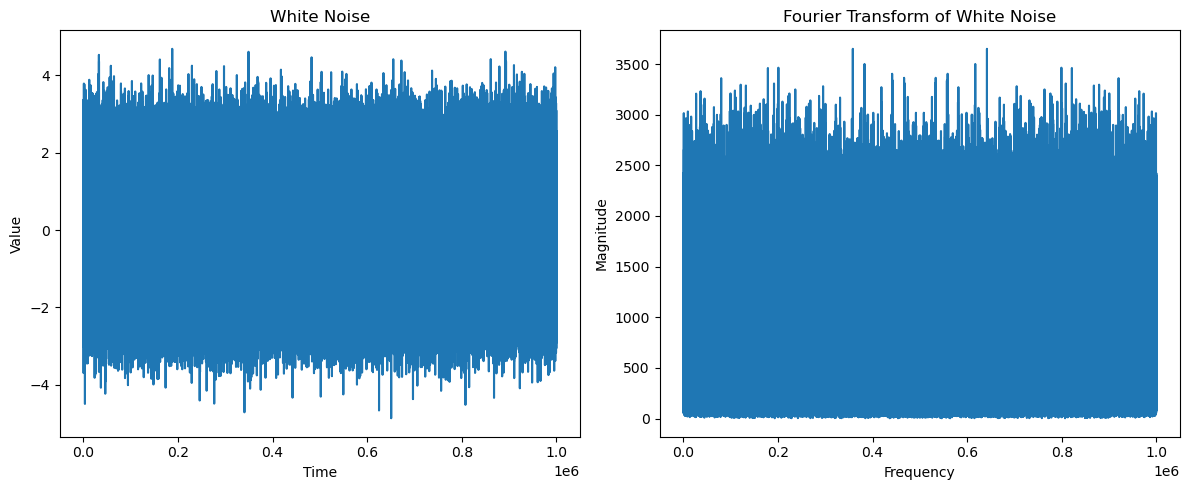

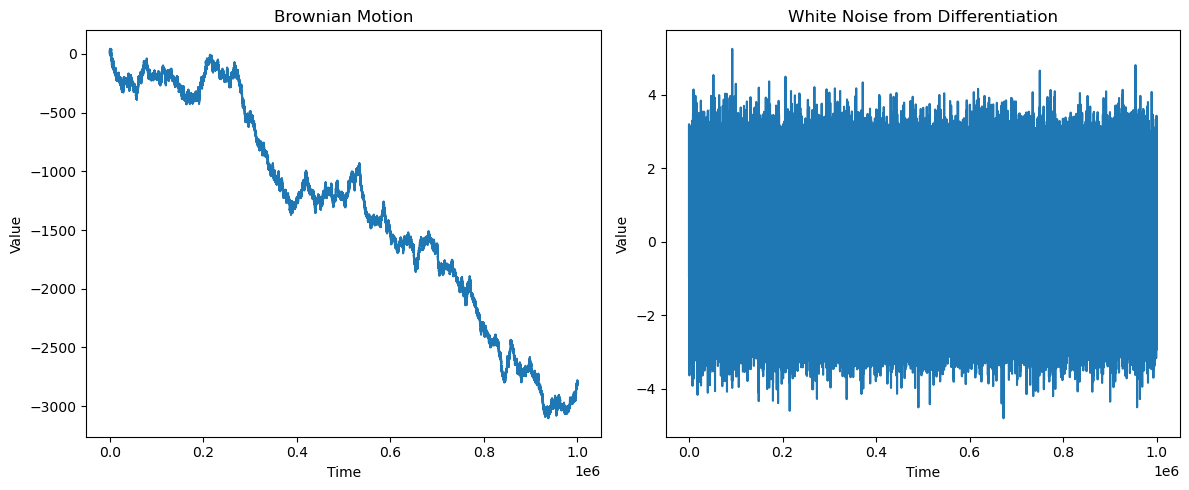

CPU times: total: 3.27 s
Wall time: 3.46 s


In [3]:
%%time

### Euler-Maruyama generation of Brownian motion
import numpy as np
import matplotlib.pyplot as plt

# Euler-Maruyama parameters
T = 1.0
N = 1000000
dt = T/N

# Brownian motion simulation using Euler-Maruyama
W = np.zeros(N)
for i in range(1, N):
    W[i] = W[i-1] + np.sqrt(dt) * np.random.normal()

# Fourier Transform of the simulated process
W_fft = np.fft.fft(W)

# Plotting the real part of the Fourier Transform
freq = np.fft.fftfreq(N, dt)
plt.plot(freq, np.real(W_fft))
plt.title('Spectral Representation of Simulated Brownian Motion')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


### FFT generation of fractional Brownian motion (fBm)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
H = 0.5   # Hurst parameter (0 < H < 1)
T = 1.0   # Total time
dt = T/N  # Time increment

# Frequency vector (positive and negative frequencies)
freq_positive = np.fft.fftfreq(N, dt)[:N//2]
freq_negative = np.fft.fftfreq(N, dt)[N//2:]
freq = np.concatenate((freq_positive, freq_negative[::-1]))

# Power Spectral Density (PSD) corresponding to fBm
PSD = np.concatenate(([1], 1 / np.abs(freq_positive[1:]) ** (2 * H + 1), [1], 1 / np.abs(freq_negative[:0:-1]) ** (2 * H + 1)))

# Generate white noise and FFT
white_noise = np.random.normal(size=N)
white_noise_fft = np.fft.fft(white_noise)

# Multiply by the square root of the PSD
fBm_fft = white_noise_fft * np.sqrt(PSD)

# Inverse FFT to obtain fBm
fBm = np.fft.ifft(fBm_fft).real

# Plotting
plt.plot(np.linspace(0, T, N), fBm)
plt.title('Fractional Brownian Motion (fBm) with H = ' + str(H))
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


###Fourier transform of white noise
import numpy as np
import matplotlib.pyplot as plt

# Parameters

# Generate white noise
white_noise = np.random.normal(size=N)

# Compute Fourier Transform
fourier_transform = np.fft.fft(white_noise)

# Plotting White Noise
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(white_noise)
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting Fourier Transform (Magnitude)
plt.subplot(1, 2, 2)
plt.plot(np.abs(fourier_transform))
plt.title('Fourier Transform of White Noise')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()



### Brownian motion differentiated is white noise; in discrete, differenced approximately

import numpy as np
import matplotlib.pyplot as plt

# Simulate Brownian motion
brownian_motion = np.cumsum(np.random.normal(size=N))

# Differentiate to create white noise
white_noise = np.diff(brownian_motion)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(brownian_motion)
plt.title('Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.plot(white_noise)
plt.title('White Noise from Differentiation')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()



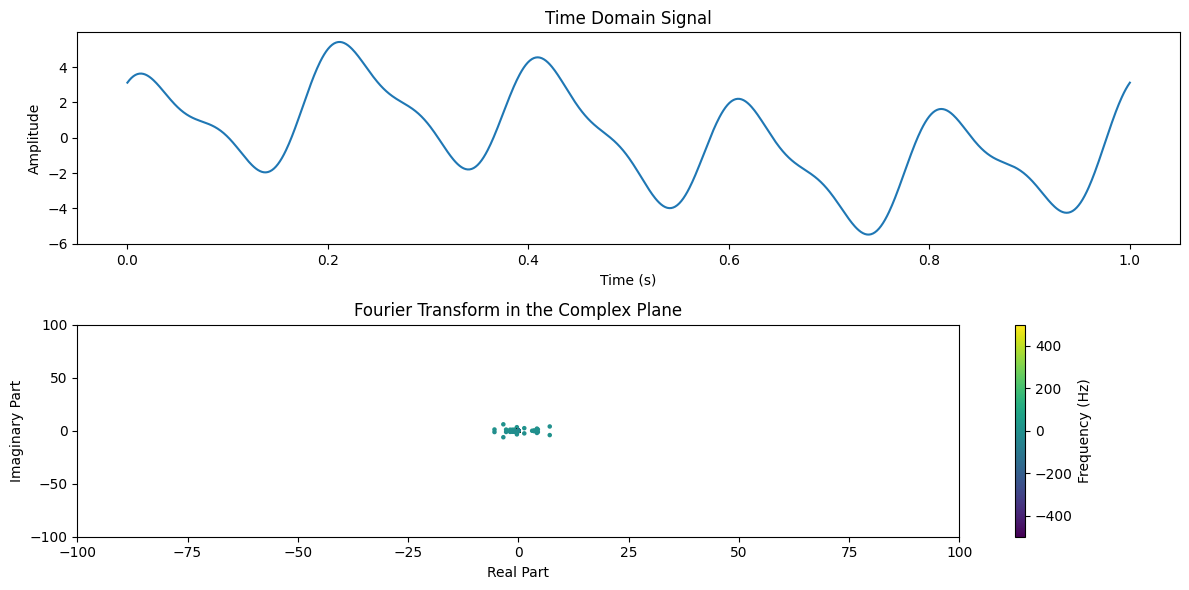

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define a composite signal made up of several sine waves
def composite_signal(time):
    frequencies = [1, 5, 10]
    amplitudes = [2, 3, 1]
    phases = [0, np.pi / 4, np.pi / 2]
    signal = sum(amp * np.sin(2 * np.pi * freq * time + phase)
                 for amp, freq, phase in zip(amplitudes, frequencies, phases))
    return signal

# Time domain parameters
t = np.linspace(0, 1, 1000)
signal = composite_signal(t)

# Compute the Fourier transform using NumPy
F_omega = np.fft.fft(signal)

# Get the real and imaginary parts
real_part = np.real(F_omega)
imag_part = np.imag(F_omega)

# Frequency values
frequencies = np.fft.fftfreq(len(signal), d=(t[1] - t[0]))

# Plot the signal in the time domain
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the Fourier transform in the complex plane
plt.subplot(2, 1, 2)
plt.scatter(real_part, imag_part, s=5, c=frequencies, cmap="viridis")
plt.colorbar(label="Frequency (Hz)")
plt.title("Fourier Transform in the Complex Plane")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.xlim([-100, 100])
plt.ylim([-100, 100])

plt.tight_layout()
plt.show()


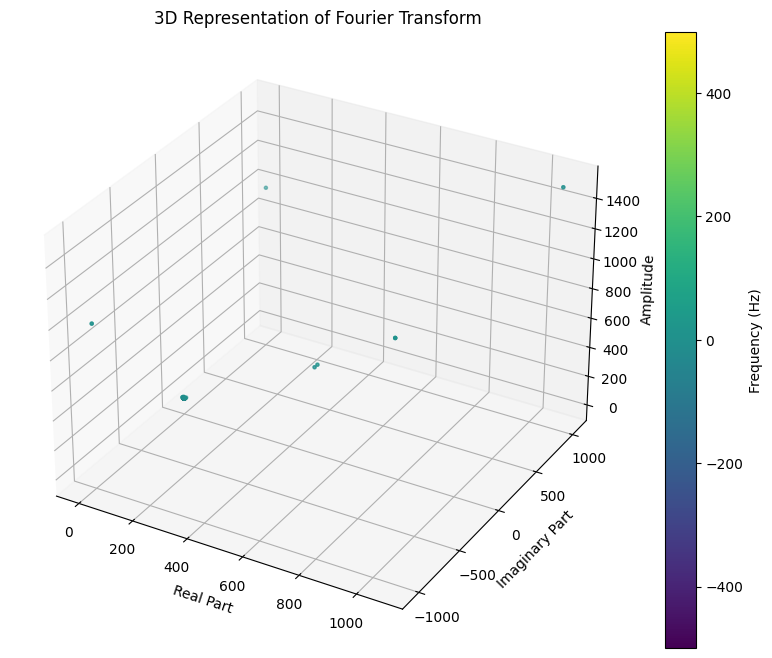

In [3]:
### Same thing in 3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a composite signal as before
def composite_signal(time):
    frequencies = [1, 5, 10]
    amplitudes = [2, 3, 1]
    phases = [0, np.pi / 4, np.pi / 2]
    signal = sum(amp * np.sin(2 * np.pi * freq * time + phase)
                 for amp, freq, phase in zip(amplitudes, frequencies, phases))
    return signal

# Time domain parameters
t = np.linspace(0, 1, 1000)
signal = composite_signal(t)

# Compute the Fourier transform using NumPy
F_omega = np.fft.fft(signal)

# Get the real and imaginary parts
real_part = np.real(F_omega)
imag_part = np.imag(F_omega)

# Compute the amplitude
amplitude = np.abs(F_omega)

# Frequency values
frequencies = np.fft.fftfreq(len(signal), d=(t[1] - t[0]))

# Plot the 3D representation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for real part, imaginary part, and amplitude
ax.scatter(real_part, imag_part, amplitude, c=frequencies, cmap="viridis", s=5)
ax.set_xlabel("Real Part")
ax.set_ylabel("Imaginary Part")
ax.set_zlabel("Amplitude")
plt.title("3D Representation of Fourier Transform")
plt.colorbar(ax.scatter(real_part, imag_part, amplitude, c=frequencies, cmap="viridis", s=5), label="Frequency (Hz)")

plt.show()


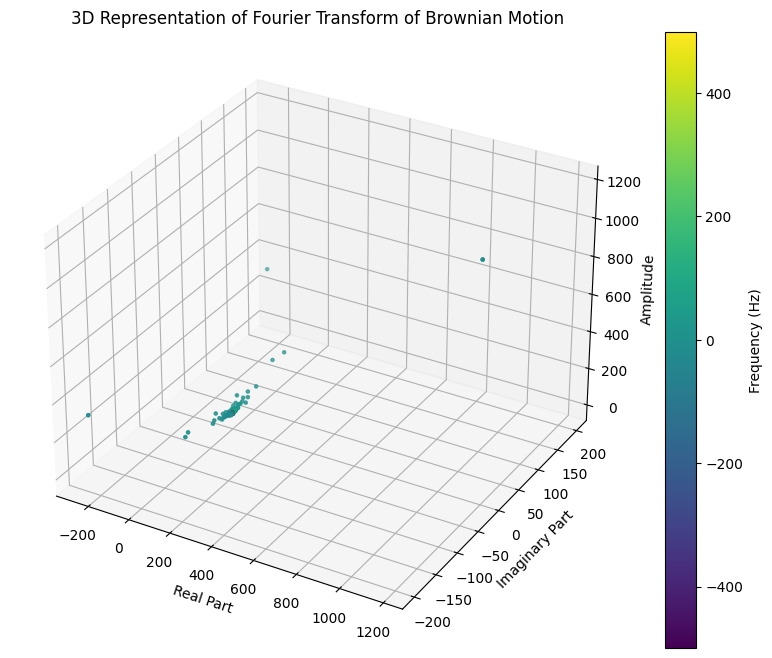

In [4]:
### Same for Brownian motion realization

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate Brownian motion
def brownian_motion(N, T):
    dt = T/N
    dW = np.sqrt(dt) * np.random.normal(size=N)
    W = np.cumsum(dW)
    return W

# Time domain parameters
N = 1000
T = 1
t = np.linspace(0, T, N)
signal = brownian_motion(N, T)

# Compute the Fourier transform using NumPy
F_omega = np.fft.fft(signal)

# Get the real and imaginary parts
real_part = np.real(F_omega)
imag_part = np.imag(F_omega)

# Compute the amplitude
amplitude = np.abs(F_omega)

# Frequency values
frequencies = np.fft.fftfreq(len(signal), d=(t[1] - t[0]))

# Plot the 3D representation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for real part, imaginary part, and amplitude
ax.scatter(real_part, imag_part, amplitude, c=frequencies, cmap="viridis", s=5)
ax.set_xlabel("Real Part")
ax.set_ylabel("Imaginary Part")
ax.set_zlabel("Amplitude")
plt.title("3D Representation of Fourier Transform of Brownian Motion")
plt.colorbar(ax.scatter(real_part, imag_part, amplitude, c=frequencies, cmap="viridis", s=5), label="Frequency (Hz)")

plt.show()


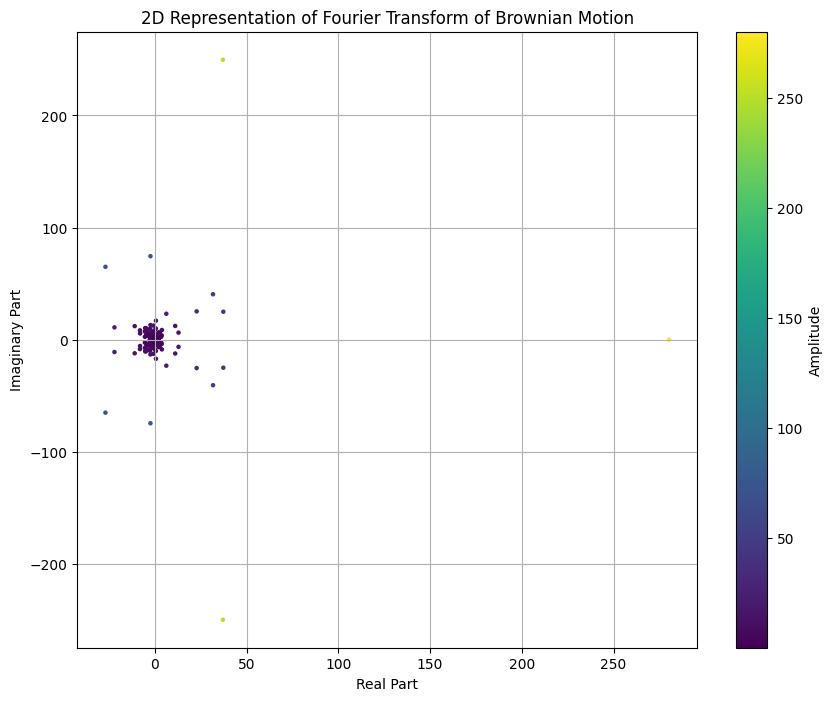

In [5]:
### Same example with color mapping

import numpy as np
import matplotlib.pyplot as plt

# Generate Brownian motion
def brownian_motion(N, T):
    dt = T/N
    dW = np.sqrt(dt) * np.random.normal(size=N)
    W = np.cumsum(dW)
    return W

# Time domain parameters
N = 1000
T = 1
t = np.linspace(0, T, N)
signal = brownian_motion(N, T)

# Compute the Fourier transform using NumPy
F_omega = np.fft.fft(signal)

# Get the real and imaginary parts
real_part = np.real(F_omega)
imag_part = np.imag(F_omega)

# Compute the amplitude
amplitude = np.abs(F_omega)

# Frequency values
frequencies = np.fft.fftfreq(len(signal), d=(t[1] - t[0]))

# Plot the 2D representation in the complex plane with color mapping for amplitude
plt.figure(figsize=(10, 8))
plt.scatter(real_part, imag_part, c=amplitude, cmap="viridis", s=5)
plt.colorbar(label="Amplitude")
plt.title("2D Representation of Fourier Transform of Brownian Motion")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid(True)

plt.show()


<IPython.core.display.Javascript object>


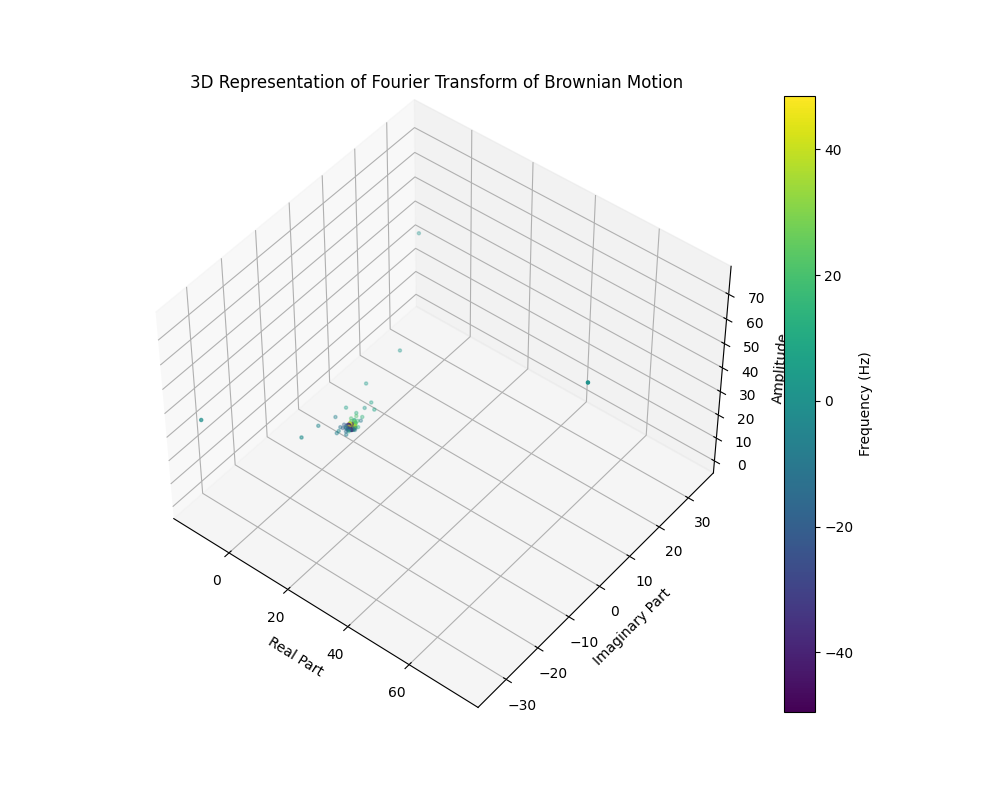

In [1]:
### Rotation accessible 3D example

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate Brownian motion
def brownian_motion(N, T):
    dt = T/N
    dW = np.sqrt(dt) * np.random.normal(size=N)
    W = np.cumsum(dW)
    return W

# Time domain parameters
N = 100
T = 1
t = np.linspace(0, T, N)
signal = brownian_motion(N, T)

# Compute the Fourier transform using NumPy
F_omega = np.fft.fft(signal)

# Get the real and imaginary parts
real_part = np.real(F_omega)
imag_part = np.imag(F_omega)

# Compute the amplitude
amplitude = np.abs(F_omega)

# Frequency values
frequencies = np.fft.fftfreq(len(signal), d=(t[1] - t[0]))

# Plot the 3D representation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for real part, imaginary part, and amplitude
scatter_plot = ax.scatter(real_part, imag_part, amplitude, c=frequencies, cmap="viridis", s=5)
ax.set_xlabel("Real Part")
ax.set_ylabel("Imaginary Part")
ax.set_zlabel("Amplitude")
plt.title("3D Representation of Fourier Transform of Brownian Motion")
plt.colorbar(scatter_plot, label="Frequency (Hz)")

# Show the plot with interactive rotation
plt.show()

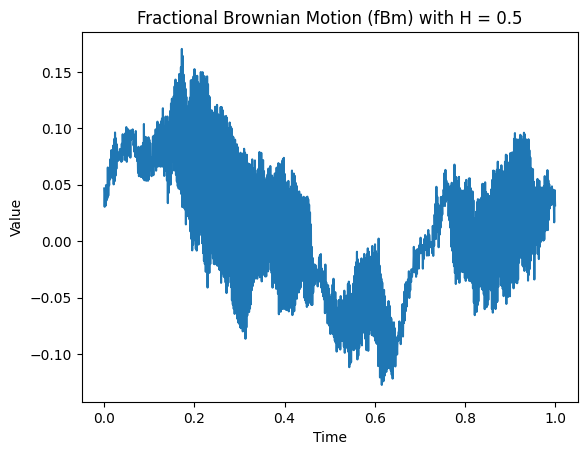

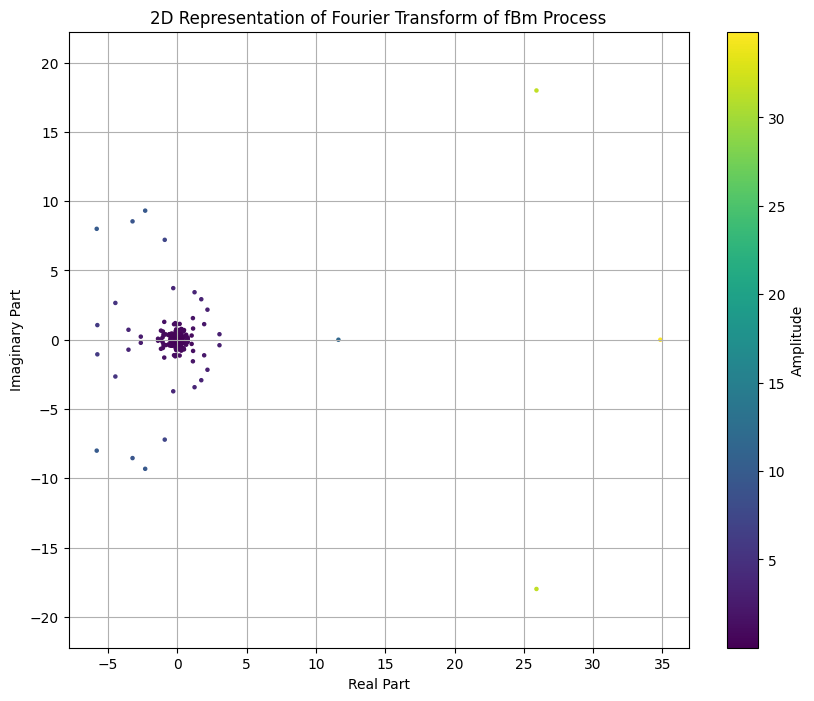

In [139]:
### Complex Plane Fourier transform of fBm with Color Mapping for Amplitude

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of points
H = 0.5   # Hurst parameter (0 < H < 1)
T = 1   # Total time
dt = T/N  # Time increment

# Frequency vector (positive and negative frequencies)
freq_positive = np.fft.fftfreq(N, dt)[:N//2]
freq_negative = np.fft.fftfreq(N, dt)[N//2:]
freq = np.concatenate((freq_positive, freq_negative[::-1]))

# Power Spectral Density (PSD) corresponding to fBm
PSD = np.concatenate(([1], 1 / np.abs(freq_positive[1:]) ** (2 * H + 1), [1], 1 / np.abs(freq_negative[:0:-1]) ** (2 * H + 1)))

# Generate white noise and FFT
white_noise = np.random.normal(size=N)
white_noise_fft = np.fft.fft(white_noise)

# Multiply by the square root of the PSD
fBm_fft = white_noise_fft * np.sqrt(PSD)

# Inverse FFT to obtain fBm
fBm = np.fft.ifft(fBm_fft).real

# Plotting
plt.plot(np.linspace(0, T, N), fBm)
plt.title('Fractional Brownian Motion (fBm) with H = ' + str(H))
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Compute the Fourier transform of the fBm
F_omega = np.fft.fft(fBm)

# Get the real and imaginary parts
real_part = np.real(F_omega)
imag_part = np.imag(F_omega)

# Compute the amplitude
amplitude = np.abs(F_omega)

# Plot the 2D representation in the complex plane
plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(real_part, imag_part, c=amplitude, cmap="viridis", s=5)
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("2D Representation of Fourier Transform of fBm Process")
plt.colorbar(scatter_plot, label="Amplitude")
plt.grid(True)
plt.axis('equal')
plt.show()



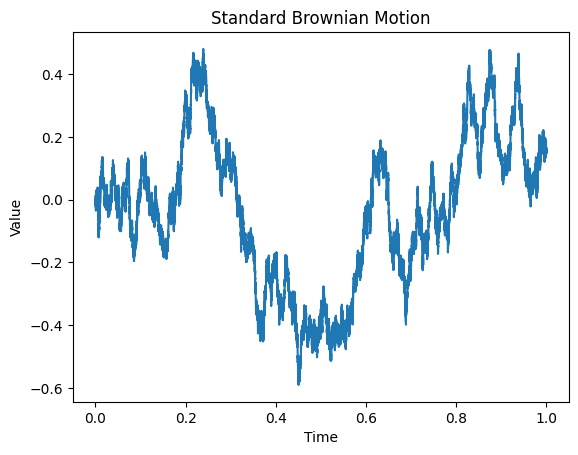

In [154]:
### Dense Euler-Maruyama generation of Brownian motion
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100000  # Number of points
T = 1     # Total time
dt = T/N  # Time increment

# Initialize the Brownian motion path
B = np.zeros(N)

# Incremental Wiener process
dW = np.sqrt(dt) * np.random.normal(size=N-1)

# Euler-Maruyama simulation
for i in range(1, N):
    B[i] = B[i-1] + dW[i-1]

# Plotting
plt.plot(np.linspace(0, T, N), B)
plt.title('Standard Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


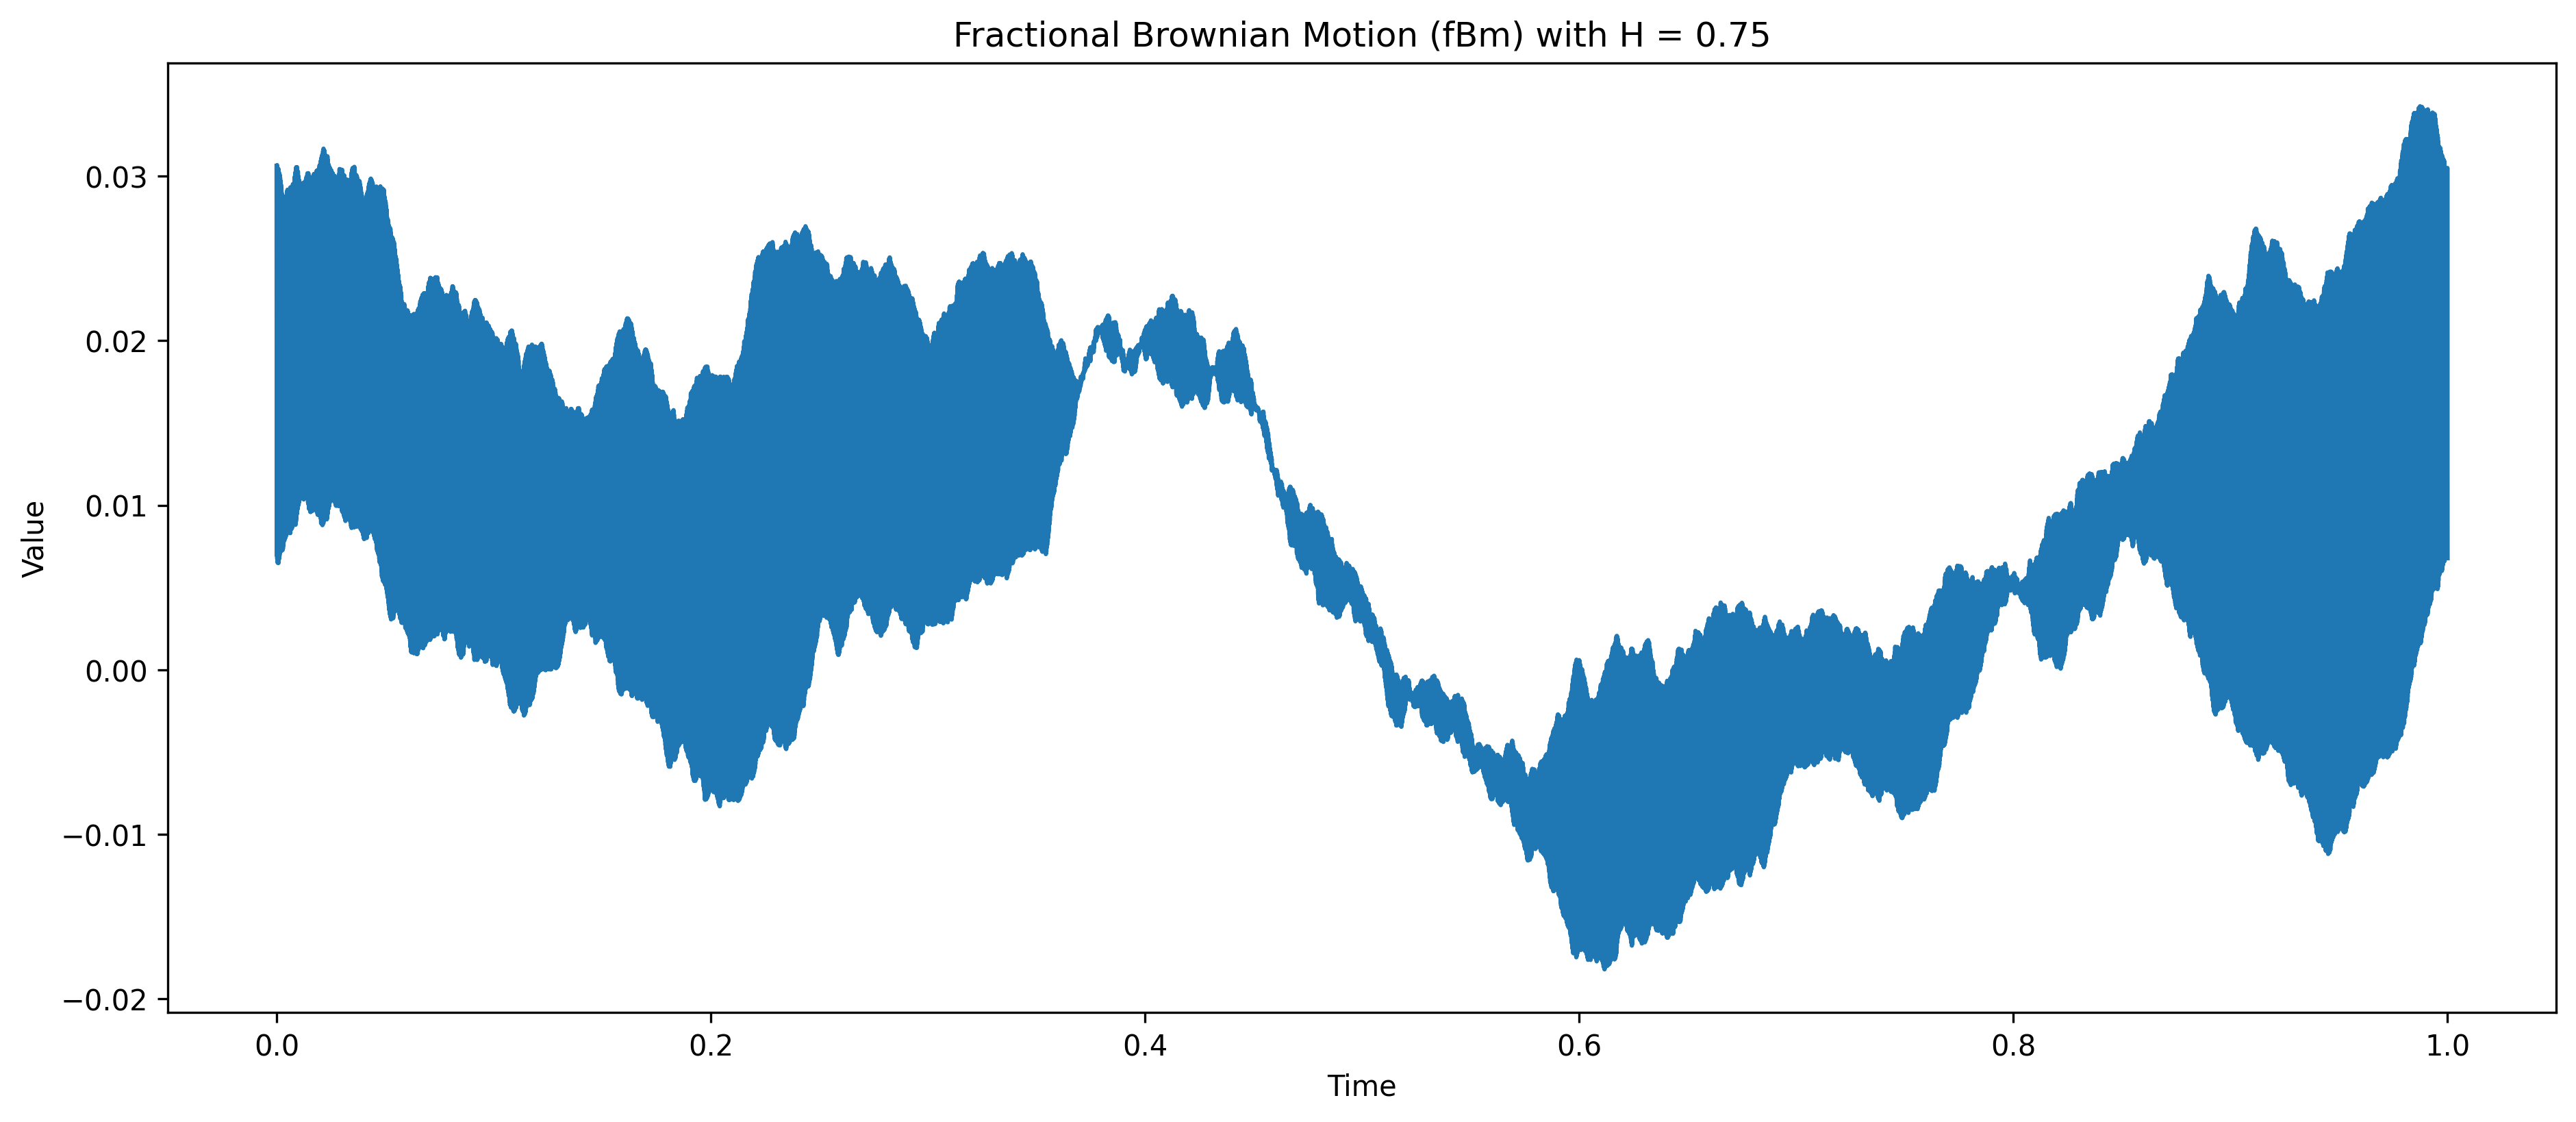

In [5]:
### High resolution fBm with H=0.75

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10000  # Number of points
H = 0.75  # Hurst parameter (0 < H < 1)
T = 1     # Total time
dt = T/N  # Time increment

# Frequency vector (positive and negative frequencies)
freq_positive = np.fft.fftfreq(N, dt)[:N//2]
freq_negative = np.fft.fftfreq(N, dt)[N//2:]
freq = np.concatenate((freq_positive, freq_negative[::-1]))

# Power Spectral Density (PSD) corresponding to fBm
PSD = np.concatenate(([1], 1 / np.abs(freq_positive[1:]) ** (2 * H + 1), [1], 1 / np.abs(freq_negative[:0:-1]) ** (2 * H + 1)))

# Generate white noise and FFT
white_noise = np.random.normal(size=N)
white_noise_fft = np.fft.fft(white_noise)

# Multiply by the square root of the PSD
fBm_fft = white_noise_fft * np.sqrt(PSD)

# Inverse FFT to obtain fBm
fBm = np.fft.ifft(fBm_fft).real

# Set figure size (width, height)
plt.figure(figsize=(15, 6), dpi=300) # Increase DPI for higher resolution

# Plotting
plt.plot(np.linspace(0, T, N), fBm)
plt.title('Fractional Brownian Motion (fBm) with H = ' + str(H))
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()


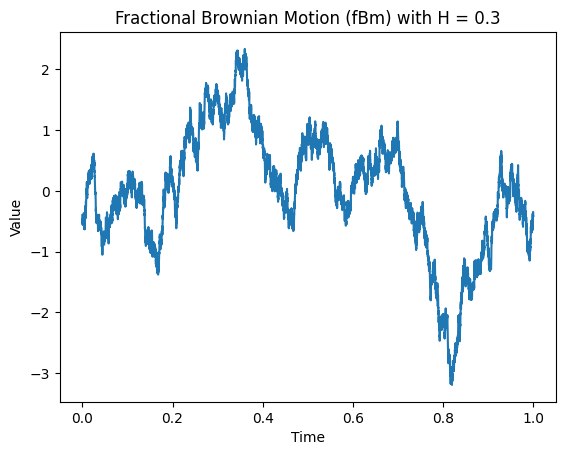

In [163]:
import numpy as np
import matplotlib.pyplot as plt

def generate_fbm(N, H, T):
    # Create the autocovariance function
    R = lambda k: 0.5 * ((abs(k) + 1) ** (2 * H) - 2 * (abs(k)) ** (2 * H) + (abs(k) - 1) ** (2 * H))

    # Generate circulant vector
    c = [R(k) for k in range(0, N)] + [R(-k) for k in range(1, N)]
    
    # Compute the FFT of the circulant vector
    lambda_circulant = np.fft.fft(c)[:N]
    
    # Check for negative eigenvalues due to numerical errors
    if np.any(lambda_circulant < 0):
        lambda_circulant[lambda_circulant < 0] = 0

    # Generate complex Gaussian random vector
    W = np.random.normal(size=N) + 1j * np.random.normal(size=N)

    # Compute product with square root of eigenvalues
    Z = np.fft.ifft(np.sqrt(lambda_circulant) * W)
    
    # Take real part and normalize to create fBm
    fBm = np.cumsum(np.real(Z))
    fBm -= np.mean(fBm) # Subtracting the mean
    fBm /= np.std(fBm)  # Dividing by the standard deviation
    
    return fBm

# Parameters
N = 10000  # Number of points
H = 0.3   # Hurst parameter (0 < H < 1) interestingly can't be 0.5 for this sim
T = 1     # Total time

# Generating fBm
fBm = generate_fbm(N, H, T)

# Plotting
plt.plot(np.linspace(0, T, N), fBm)
plt.title('Fractional Brownian Motion (fBm) with H = ' + str(H))
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


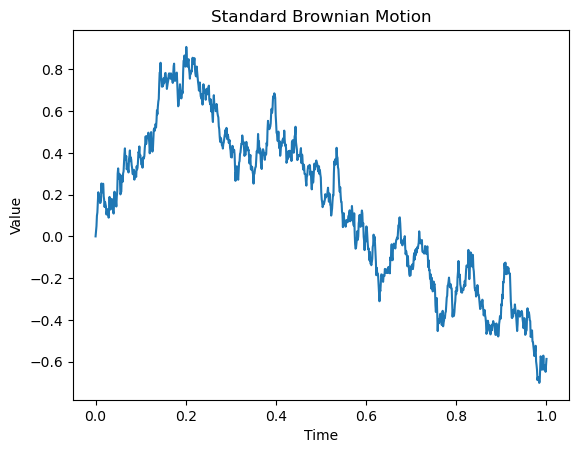

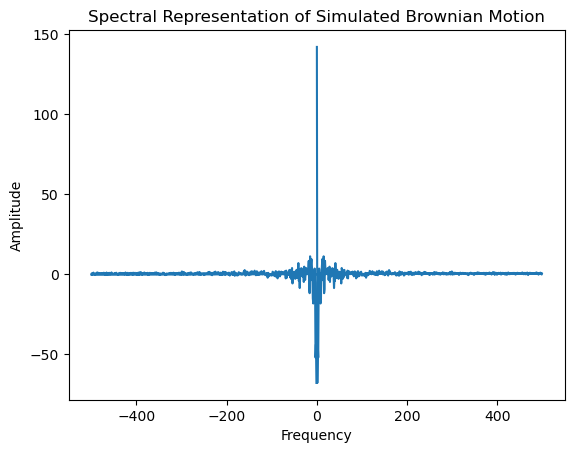

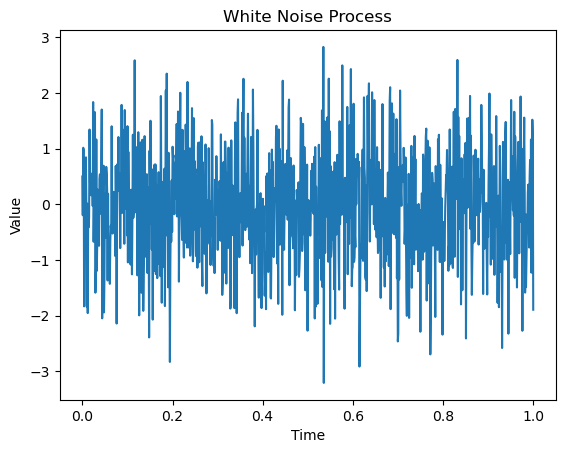

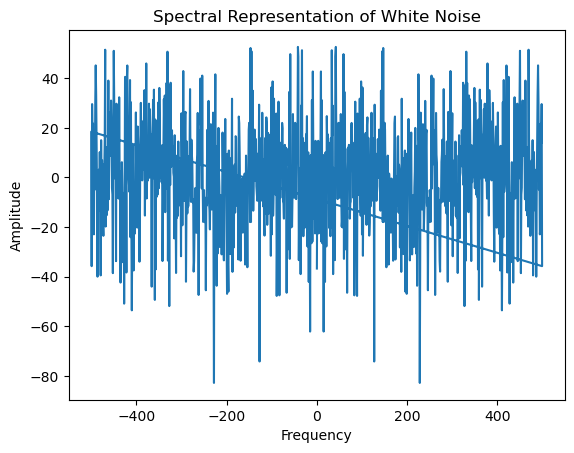

In [1]:
### This is a buggy code I wrote, so take it with a grain of salt.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
N = 1000  # Number of points
T = 1     # Total time
dt = T/N  # Time increment

# Initialize the Brownian motion path
B = np.zeros(N)

# Incremental Wiener process
dW = np.sqrt(dt) * np.random.normal(size=N-1)

# Euler-Maruyama simulation
for i in range(1, N):
    B[i] = B[i-1] + dW[i-1]

# Plotting
plt.plot(np.linspace(0, T, N), B)
plt.title('Standard Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Fourier Transform of the simulated process
B_fft = np.fft.fft(B)

# Plotting the real part of the Fourier Transform
freq = np.fft.fftfreq(N, dt)
plt.plot(freq, np.real(B_fft))
plt.title('Spectral Representation of Simulated Brownian Motion')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Parameters
N = 1000
T= 1
dt = T/N

#White Noise as Random Vector
W = np.random.normal(size=N)

# Plotting
plt.plot(np.linspace(0, T, N), W)
plt.title('White Noise Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Fourier Transform of the simulated process
W_fft = np.fft.fft(W)

# Plotting the real part of the Fourier Transform
freq = np.fft.fftfreq(N, dt)
plt.plot(freq, np.real(W_fft))
plt.title('Spectral Representation of White Noise')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

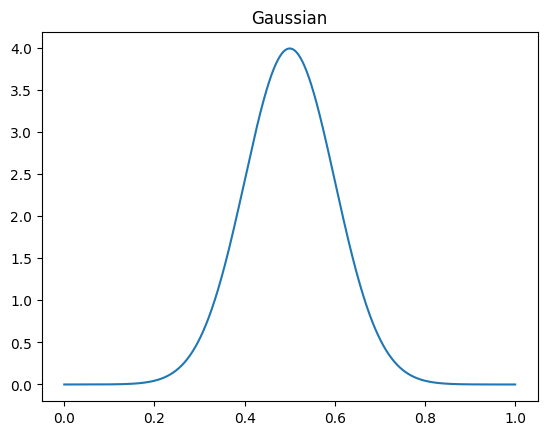

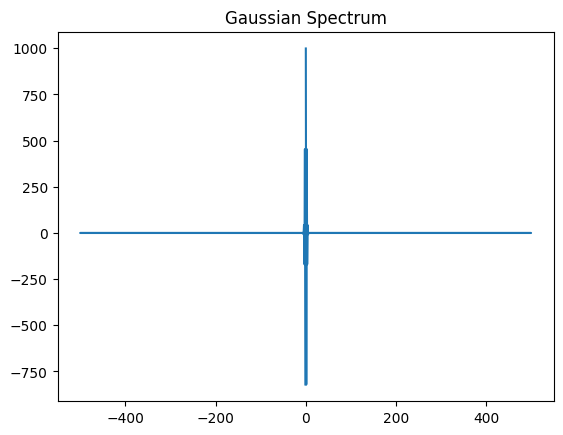

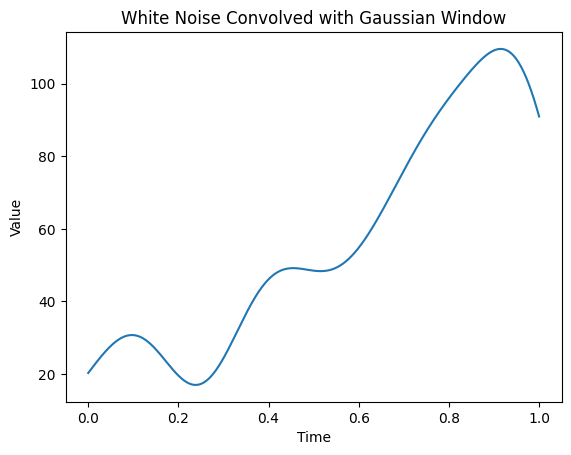

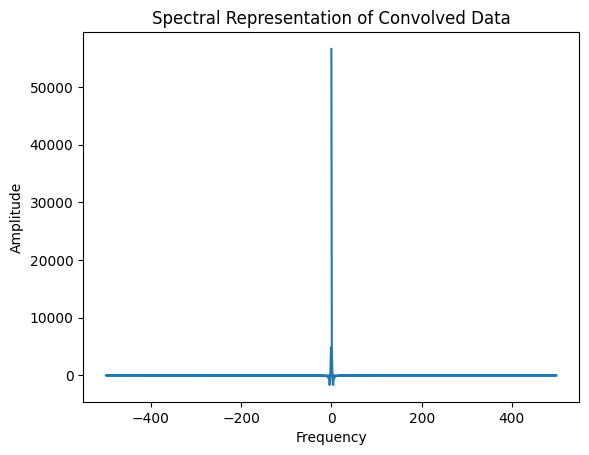

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000
T = 1
dt = T / N

# White Noise as Random Vector
W = np.random.normal(size=N)

# Gaussian Window Function
sigma = 0.1  # Standard deviation of the Gaussian
t = np.linspace(0, T, N)
mu = 0.5
window = 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * (t - mu) ** 2 / sigma ** 2)

#plot gaussian
plt.plot(t, window)
plt.title('Gaussian')
plt.show()

#plot gaussian fft
freq = np.fft.fftfreq(N, dt)
plt.plot(freq, np.real(np.fft.fft(window)))
plt.title('Gaussian Spectrum')
plt.show()

# Convolve White Noise with Gaussian Window
convolved_data = np.convolve(W, window, mode='same')

# Plotting the Convolved Data in the Time Domain
plt.plot(t, convolved_data)
plt.title('White Noise Convolved with Gaussian Window')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Fourier Transform of the Convolved Data
convolved_fft = np.fft.fft(convolved_data)

# Plotting the real part of the Fourier Transform
plt.plot(freq, np.real(convolved_fft))
plt.title('Spectral Representation of Convolved Data')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()




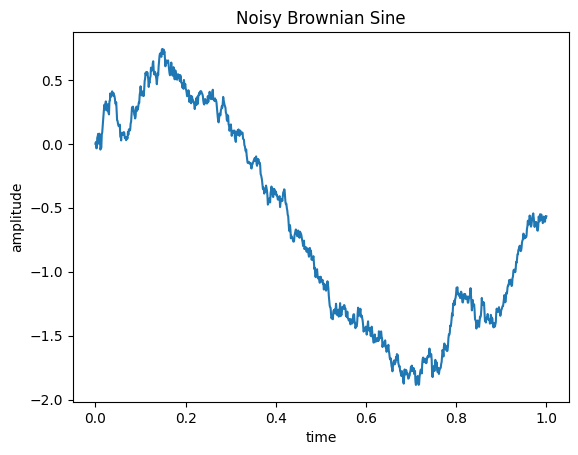

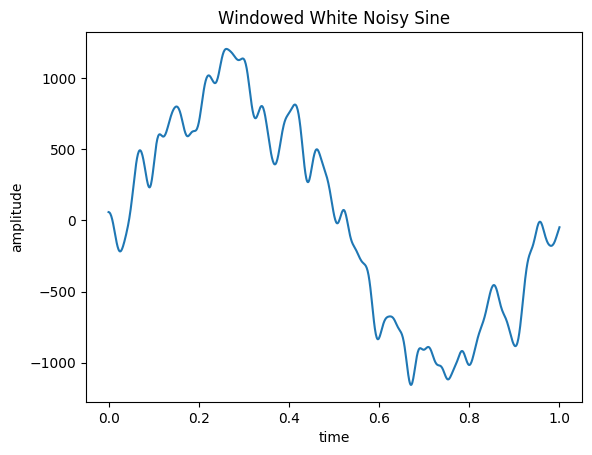

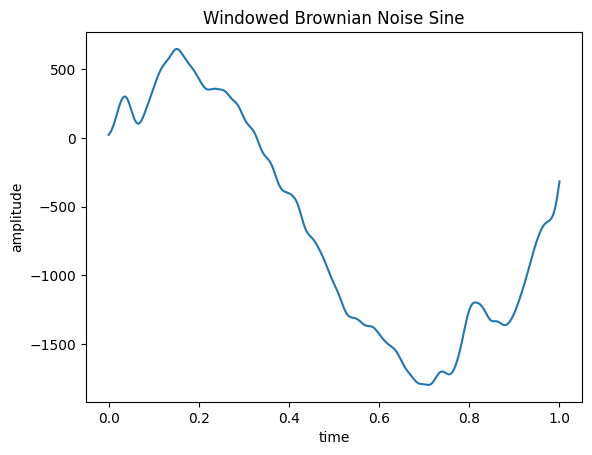

In [121]:
###Generate a noisy sine wave with Brownian motion

import numpy as np
import matplotlib.pyplot as plt

#Parameters

N=1000
T=1
dt=T/N
dW = np.sqrt(dt) * np.random.normal(size=N-1)
t = np.linspace(0, T, N)
W = np.random.normal(size=N)

#Sine wave
m=np.arange(0,T,dt)
x = np.sin(2 * np.pi * m) #x=sin(2pi*m)
y=np.zeros(N) #initialize y

#Brownian motion
for i in range(1, N):
    y[i] = y[i-1] + dW[i-1]

z=x+y
    
plt.plot(t, z)
plt.title('Noisy Brownian Sine')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

# Gaussian Window Function
sigma = 0.01  # Standard deviation of the Gaussian
mu = 0.5
window = 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * (t - mu) ** 2 / sigma ** 2)

a=x+W ###something is going on at or after this point
b=np.convolve(a,window,mode='same')
    
plt.plot(t, b)
plt.title('Windowed White Noisy Sine')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

#brownian windowed
c=np.convolve(z,window,mode='same')
plt.plot(t,c)
plt.title('Windowed Brownian Noise Sine')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

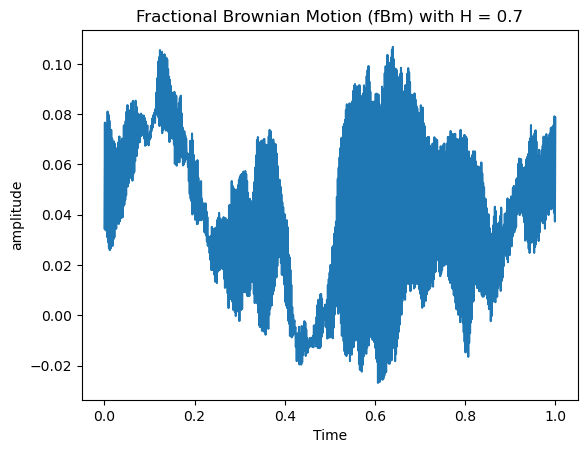

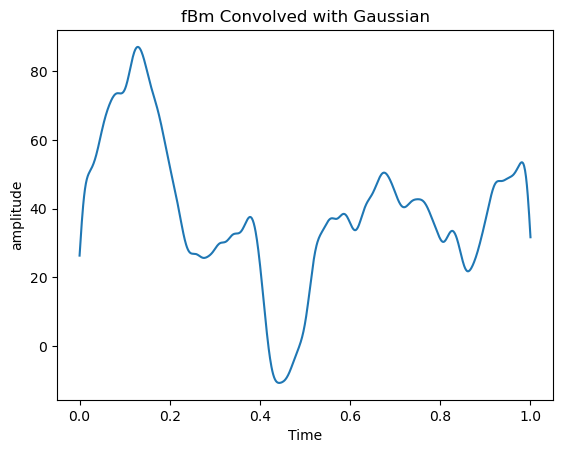

In [21]:
### High resolution fBm convolved with Gaussian window

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of points
H = 0.7   # Hurst parameter (0 < H < 1)
T = 1     # Total time
dt = T/N  # Time increment
t = np.linspace(0, T, N)

# Frequency vector (positive and negative frequencies)
freq_positive = np.fft.fftfreq(N, dt)[:N//2]
freq_negative = np.fft.fftfreq(N, dt)[N//2:]
freq = np.concatenate((freq_positive, freq_negative[::-1]))

# Power Spectral Density (PSD) corresponding to fBm
PSD = np.concatenate(([1], 1 / np.abs(freq_positive[1:]) ** (2 * H + 1), [1], 1 / np.abs(freq_negative[:0:-1]) ** (2 * H + 1)))

# Generate white noise and FFT
white_noise = np.random.normal(size=N)
white_noise_fft = np.fft.fft(white_noise)

# Multiply by the square root of the PSD
fBm_fft = white_noise_fft * np.sqrt(PSD)

# Inverse FFT to obtain fBm
fBm = np.fft.ifft(fBm_fft).real

# Plotting
plt.plot(t, fBm)
plt.title('Fractional Brownian Motion (fBm) with H = ' + str(H))
plt.xlabel('Time')
plt.ylabel('amplitude')

plt.show()

# Gaussian Window Function
sigma = 0.01  # Standard deviation of the Gaussian
mu = 0.5
window = 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * (t - mu) ** 2 / sigma ** 2)

#convolution
fBm_convolved=np.convolve(fBm,window,mode='same')
plt.plot(np.linspace(0,T,N),fBm_convolved)
plt.title('fBm Convolved with Gaussian')
plt.xlabel('Time')
plt.ylabel('amplitude')

plt.show()

Some random notes thusfar: fBm processes with H close to 0.5 instead of reducing to Euler-Maruyama-esque processes retain a pretty high variance or even heterskedasticity unless window convolved. This is reasonable, considering that even Brownian processes never converge probabilistically to a point and jump around, but it's lucky there are methods of retrieving
statistical properties of the EM scheme using these fBm methods: circulants, spectral, etc. As for integrating a white noise process as a way of generating Brownian motion, it seems tractable visually but there are probably hidden consequences, as with attempting to generate BM by reducing fBm methods. It's worth investigating whether numerical aspects of the code are generating these distinctions, which would disappear or be irrelevant in the macro-scale, but that requires loss-functions and more complex considerations I'm not yet familiar with.

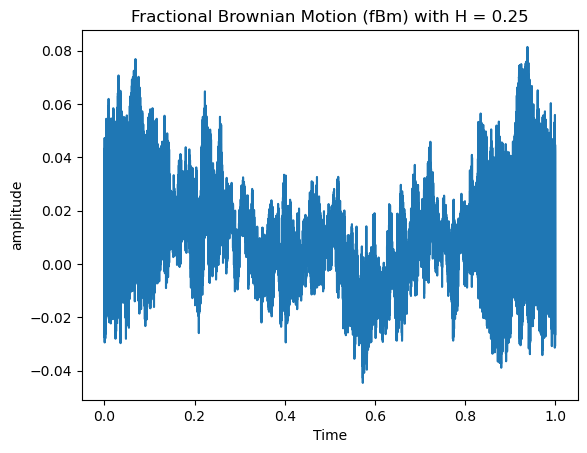

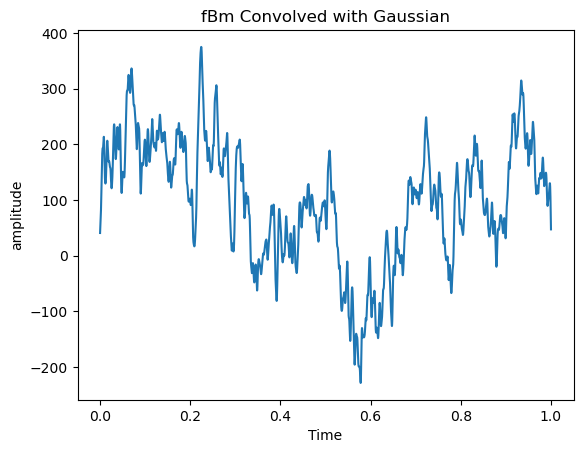

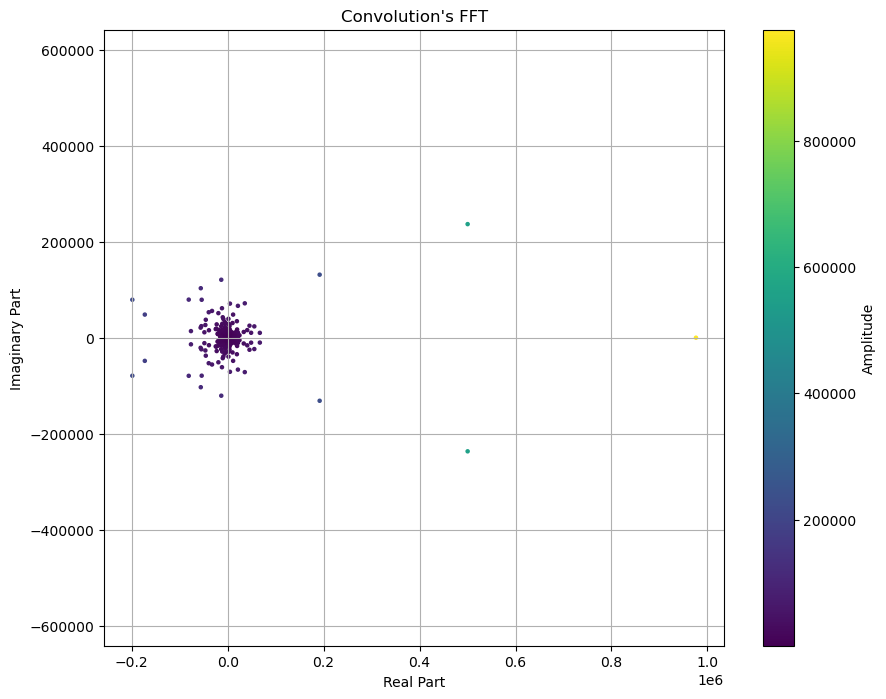

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10000  # Number of points
H = 0.25  # Hurst parameter (0 < H < 1)
T = 1     # Total time
dt = T/N  # Time increment
t = np.linspace(0, T, N)

# Frequency vector (positive and negative frequencies)
freq_positive = np.fft.fftfreq(N, dt)[:N//2]
freq_negative = np.fft.fftfreq(N, dt)[N//2:]
freq = np.concatenate((freq_positive, freq_negative[::-1]))

# Power Spectral Density (PSD) corresponding to fBm
PSD = np.concatenate(([1], 1 / np.abs(freq_positive[1:]) ** (2 * H + 1), [1], 1 / np.abs(freq_negative[:0:-1]) ** (2 * H + 1)))

# Generate white noise and FFT
white_noise = np.random.normal(size=N)
white_noise_fft = np.fft.fft(white_noise)

# Multiply by the square root of the PSD
fBm_fft = white_noise_fft * np.sqrt(PSD)

# Inverse FFT to obtain fBm
fBm = np.fft.ifft(fBm_fft).real

# Plotting
plt.plot(np.linspace(0, T, N), fBm)
plt.title('Fractional Brownian Motion (fBm) with H = ' + str(H))
plt.xlabel('Time')
plt.ylabel('amplitude')

plt.show()

# Gaussian Window Function
sigma = 0.001  # Standard deviation of the Gaussian
mu = 0.5
window = 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * (t - mu) ** 2 / sigma ** 2)

#convolution
fBm_convolved=np.convolve(fBm,window,mode='same')
plt.plot(np.linspace(0,T,N),fBm_convolved)
plt.title('fBm Convolved with Gaussian')
plt.xlabel('Time')
plt.ylabel('amplitude')

plt.show()

# Compute the Fourier transform of the fBm
F_omega = np.fft.fft(fBm_convolved)

# Get the real and imaginary parts
real_part = np.real(F_omega)
imag_part = np.imag(F_omega)

# Compute the amplitude
amplitude = np.abs(F_omega)

# Plot the 2D representation in the complex plane
plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(real_part, imag_part, c=amplitude, cmap="viridis", s=5)
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Convolution's FFT")
plt.colorbar(scatter_plot, label="Amplitude")
plt.grid(True)
plt.axis('equal')
plt.show()

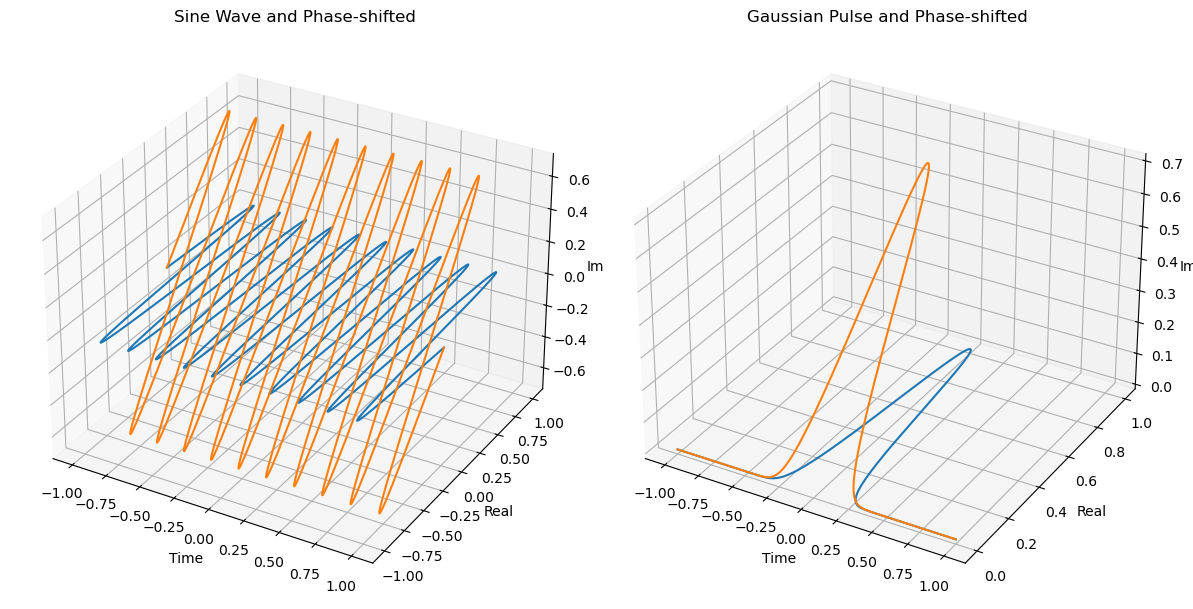

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the time and frequency domains
t = np.linspace(-1, 1, 1000)
freq = np.fft.fftfreq(len(t), t[1] - t[0])

# Define a sine wave and a Gaussian pulse
sine_wave = np.sin(2 * np.pi * 5 * t)
gaussian_pulse = np.exp(-t**2 / (2 * 0.1**2))

# Perform Fourier Transform
sine_wave_fft = np.fft.fft(sine_wave)
gaussian_fft = np.fft.fft(gaussian_pulse)

# Phase shift in frequency domain
phi = np.pi / 4
sine_wave_shifted_fft = np.exp(1j * phi) * sine_wave_fft
gaussian_shifted_fft = np.exp(1j * phi) * gaussian_fft

# Perform Inverse Fourier Transform
sine_wave_shifted = np.fft.ifft(sine_wave_shifted_fft)
gaussian_shifted = np.fft.ifft(gaussian_shifted_fft)

# Create 3D plots
fig = plt.figure(figsize=(12, 6))

# Sine wave plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('Sine Wave and Phase-shifted')
ax1.set_xlabel('Time')
ax1.set_ylabel('Real')
ax1.set_zlabel('Imag')
ax1.plot(t, sine_wave, np.zeros_like(t), label='Original')
ax1.plot(t, sine_wave_shifted.real, sine_wave_shifted.imag, label='Phase-shifted')

# Gaussian pulse plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('Gaussian Pulse and Phase-shifted')
ax2.set_xlabel('Time')
ax2.set_ylabel('Real')
ax2.set_zlabel('Imag')
ax2.plot(t, gaussian_pulse, np.zeros_like(t), label='Original')
ax2.plot(t, gaussian_shifted.real, gaussian_shifted.imag, label='Phase-shifted')

plt.tight_layout()
plt.show()
